어떤승객이 살았고 어떤승객이 죽었는지 predict하는 문제 (X가 PassengerID, Pclass ..., Y가 Survived)
- Step 1. Loading Dataset
- Step 2. Exploratory Data Analysis - 유실된 정보 확인 FE를 하기 위해
- Step 3. Visualization
- Step 4. Feature Engineering
- Step 5. Modeling - Prediction을 위해 함수를 만들고 확률값 계산
- Step 6. Prediction - 가장 높은 모델로 prediction

# Step 1. Loading Dataset

In [4]:
import time
import os
import pandas as pd
import re
import warnings         # warnings : 버전 충돌 및 특정 예외 처리를 위해 불러온 내장 모듈
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [5]:
# load train dataset
train = pd.read_csv('train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [103]:
# load test dataset
test = pd.read_csv('datasets/titanic/test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [104]:
df_all = pd.concat([train, test], sort=True).reset_index(drop=True)

In [105]:
type(df_all)

pandas.core.frame.DataFrame

In [106]:
df_all.shape

(1309, 12)

In [4]:
# Data Dictionary
# survevied - 1: True Survived, 0:False Not survived
# pclass - grade of person 1st grade :1, 2nd grade:2, 3rd grade:3
# sibSp - the number of sibling or spouse who boarded together
# Parch - the number of parents or children who boarded
# ticket - ticket number
# Fare - tick price (USD)
# cabin - room number
# embarked - the location of embarked -> S=Southhampton, C=Cherbourg, Q=Queenstown

# Stap 2. Exploratory Dataset Analysis

In [5]:
# 1. check train and testdatasets
# check top 5 data
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# check size of train dataset
train.shape

(891, 12)

In [8]:
# check size of train dataset
test.shape

(418, 11)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
# check empty info
# need a feature engineering to remove empty data
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin에 null값이 많다

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [12]:
# check empty info
# need a feature engineering to remove empty data
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

test 데이터 셋 역시 Age,  Cabin에 null값이 많다

In [14]:
# check the statistic of dataset
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
# filtering data
train[train['Age'] > 60][['Pclass', 'Name', 'Sex', 'Survived']].head(10)

,Pclass,Name,Sex,Survived
33,2,"Wheadon, Mr. Edward H",male,0
54,1,"Ostby, Mr. Engelhart Cornelius",male,0
96,1,"Goldschmidt, Mr. George B",male,0
116,3,"Connors, Mr. Patrick",male,0
170,1,"Van der hoef, Mr. Wyckoff",male,0
252,1,"Stead, Mr. William Thomas",male,0
275,1,"Andrews, Miss. Kornelia Theodosia",female,1
280,3,"Duane, Mr. Frank",male,0
326,3,"Nysveen, Mr. Johan Hansen",male,0
438,1,"Fortune, Mr. Mark",male,0


In [16]:
# filtering data by using loc
train.loc[train['Age']>60, ['Pclass', 'Name', 'Sex', 'Survived']].head(10)

,Pclass,Name,Sex,Survived
33,2,"Wheadon, Mr. Edward H",male,0
54,1,"Ostby, Mr. Engelhart Cornelius",male,0
96,1,"Goldschmidt, Mr. George B",male,0
116,3,"Connors, Mr. Patrick",male,0
170,1,"Van der hoef, Mr. Wyckoff",male,0
252,1,"Stead, Mr. William Thomas",male,0
275,1,"Andrews, Miss. Kornelia Theodosia",female,1
280,3,"Duane, Mr. Frank",male,0
326,3,"Nysveen, Mr. Johan Hansen",male,0
438,1,"Fortune, Mr. Mark",male,0


In [17]:
# age over 50 & survived & female
train[(train['Age'] > 10) & (train['Survived'] == 1) & (train['Sex'] == 'female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


In [18]:
# the list of p class =1 survived and woman
train[(train['Pclass'] == 1) & (train['Survived'] == 1) & (train['Sex'] == 'female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


In [19]:
# the number of survived and woman
len(train[(train['Pclass'] == 1) & (train['Survived'] == 1) & (train['Sex'] == 'female')])

91

In [21]:
# the list of p class = 2 survived and woman
train[(train['Pclass'] == 2 ) & (train['Survived'] == 1) & (train['Sex'] == 'female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C
53,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,NaN,S
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
801,802,1,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,NaN,S
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C


In [22]:
# the number of p class = 2 survived and woman
len(train[(train['Pclass'] == 2 ) & (train['Survived'] == 1) & (train['Sex'] == 'female')])

70

In [23]:
# the list of p class = 3 survived and woman
train[(train['Pclass'] == 3)&(train['Survived'] == 1)&(train['Sex'] == 'female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
823,824,1,3,"Moor, Mrs. (Beila)",female,27.0,0,1,392096,12.4750,E121,S
830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S
858,859,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.0,0,3,2666,19.2583,NaN,C


In [24]:
# the number of p class = 3 survived and woman
len(train[(train['Pclass'] == 3)&(train['Survived'] == 1)&(train['Sex'] == 'female')])

72

# Step 3. Visualization

In [15]:
!pip install matplotlib

     |████████████████████████████████| 8.5 MB 2.4 MB/s eta 0:00:01     |███████████████████████████▏    | 7.2 MB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 364 kB/s eta 0:00:011
     |████████████████████████████████| 2.2 MB 23.5 MB/s eta 0:00:01


In [16]:
!pip install seaborn

     |████████████████████████████████| 285 kB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 30.9 MB 19.6 MB/s eta 0:00:01    |███████████████▏                | 14.6 MB 2.8 MB/s eta 0:00:06


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [26]:
def barchart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

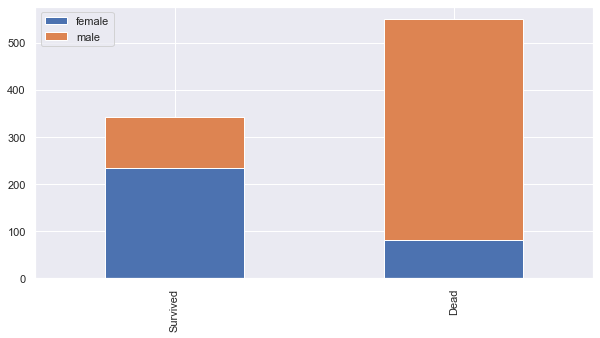

In [27]:
barchart('Sex')
# 가설 여자가 남자보다 살 확률이 높다

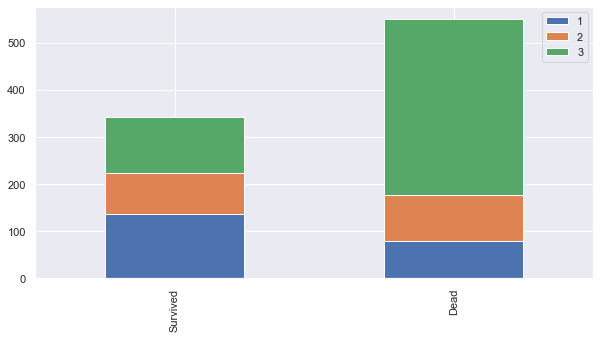

In [28]:
barchart('Pclass')
# 가설 3등급에 탑승한 사람이 상대적으로 많이 죽었다. 탑승 등급이 죽고 사는데 영향을 끼침 그러므로 예측하는데 Pclass도 필요

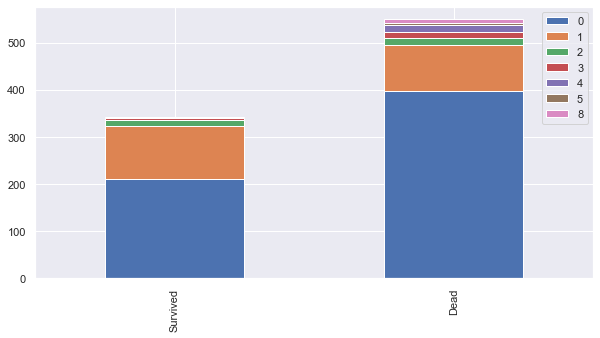

In [29]:
barchart('SibSp')
# 혼자 탓을때 상대적으로 살 확률 보다 죽을 학률이 높다

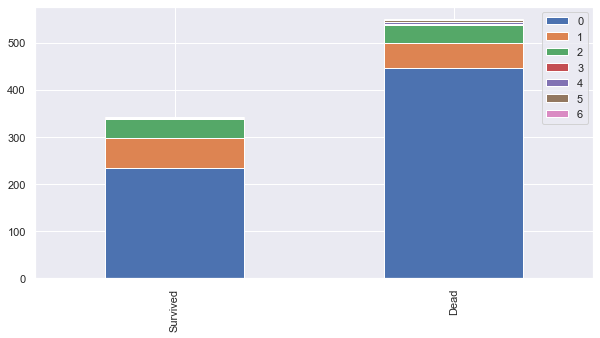

In [30]:
barchart('Parch')
# 부모님과 동승했거나 애들이 있을 경우 상대적으로 살 확률이 높다

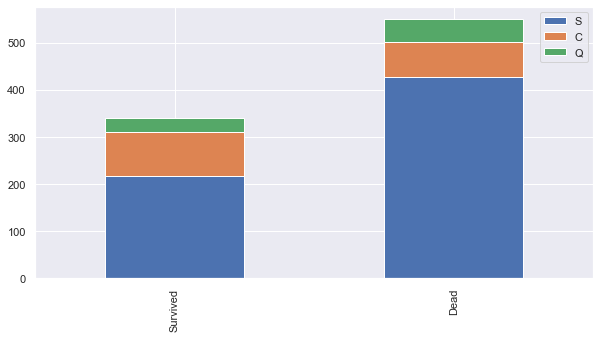

In [31]:
barchart('Embarked')

# Step 4. Feature Engineering

Feature Engineering은 모델링을 할수 있게 숫자의 집합체 즉 Feature vector를 만드는 과정이다. 즉 문자열과 숫자 다양한 데이터 셋을 모델링의 X값을 넣기 위해 숫자화 하는 것이다. 
누락 데이터는 적절한 값을 넣는다.
1. Name

In [32]:
train_test_data = [train, test]
for titanic_df in train_test_data:
    titanic_df['Title'] = titanic_df['Name'].str.extract('([A-Za-z]+)\.',expand=False)

In [33]:
# Title과 Sex를 표로 만들어줌
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [34]:
type(train_test_data)

list

In [35]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Jonkheer      1
Capt          1
Don           1
Countess      1
Ms            1
Lady          1
Sir           1
Mme           1
Name: Title, dtype: int64

In [36]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

In [37]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Dona','Johkheer','Mme'  ], 'Mrs')
    dataset['Title'] = dataset['Title'].replace(['Mlle', 'Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace(['Dr', 'Sir', 'Master', 'Rev', 'Major', 'Capt', 'Don', 'Col'], 'Mr')

In [38]:
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Jonkheer,0.000000
1,Lady,1.000000
2,Miss,0.702703
3,Mr,0.190641
4,Mrs,0.795276


In [39]:
title_mapping = {"Mr":1, "Miss":2, "Mrs":3}
for titanic_df in train_test_data:
    titanic_df['Title'] = titanic_df['Title'].map(title_mapping)
    titanic_df['Title'] = titanic_df['Title'].fillna(0)

In [40]:
train.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S,1.0
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,1.0
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C,1.0
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S,3.0


In [41]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3


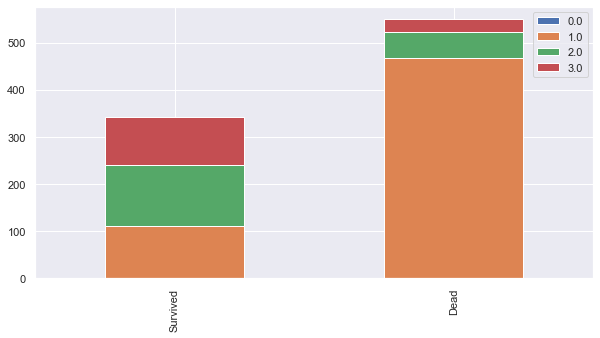

In [42]:
barchart('Title')
# Mr가 상대적으로 많이 죽었고, 2번 Miss가 상대적으로 많이 살았고, 3번 Mrs가 상대적으로 많이 살았다.

In [43]:
# delete unnecessary feature from dataset
train.drop("Name", axis=1, inplace=True)
test.drop("Name", axis=1, inplace=True)

In [44]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,3.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,1.0


In [45]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,3
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,3


2. Gender

In [46]:
gender_mapping = {"male":0, "female":1}
for titanic_df in train_test_data:
    titanic_df['Sex']=titanic_df['Sex'].map(gender_mapping)

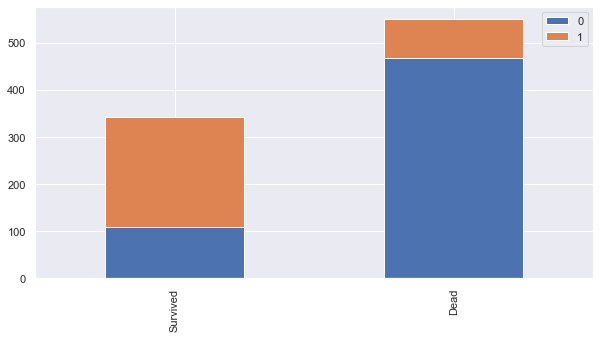

In [47]:
barchart('Sex')

3. Age

In [48]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,3.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,1.0


missing info 처리 필요
성별에 따라 평균 나이
결혼한 사람과 하지 않은사람의 각각 평균나이 

In [49]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [50]:
train.head()
train.groupby("Title")["Age"].transform("median")

0      29.0
1      35.0
2      21.0
3      35.0
4      29.0
       ... 
886    29.0
887    21.0
888    21.0
889    29.0
890    29.0
Name: Age, Length: 891, dtype: float64

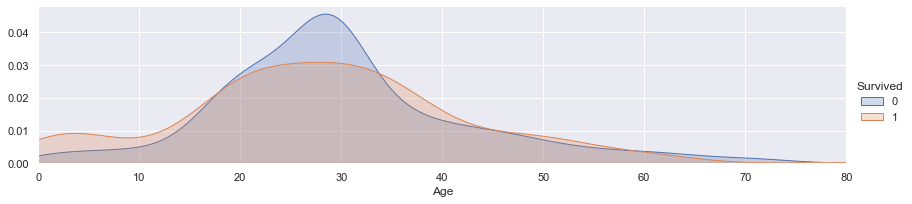

In [51]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Age", shade=True)
facet.set(xlim=(0, train["Age"].max()))
facet.add_legend()

plt.show()

(0.0, 20.0)

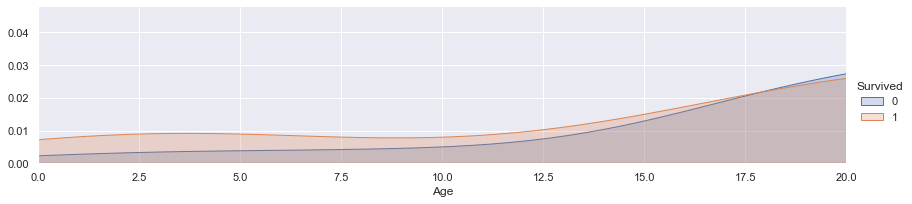

In [52]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Age", shade=True)
facet.set(xlim=(0, train["Age"].max()))
facet.add_legend()
plt.xlim(0,20)

(20.0, 30.0)

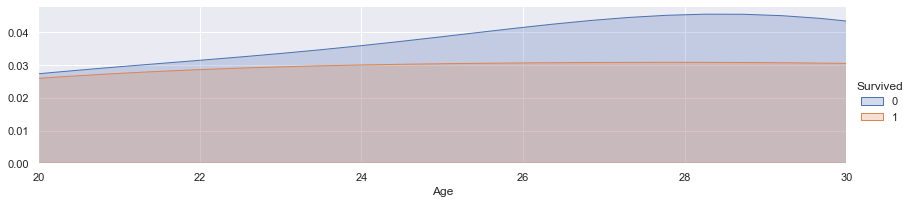

In [53]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Age", shade=True)
facet.set(xlim=(0, train["Age"].max()))
facet.add_legend()
plt.xlim(20, 30)

(30.0, 40.0)

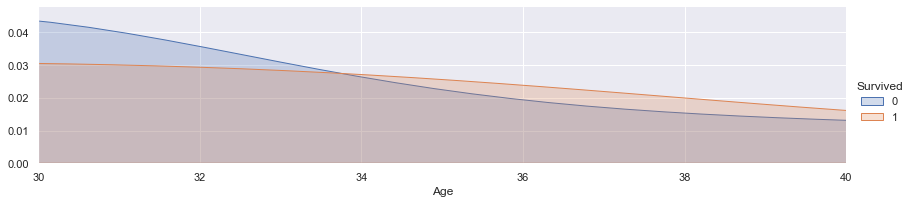

In [54]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Age", shade=True)
facet.set(xlim=(0, train["Age"].max()))
facet.add_legend()
plt.xlim(30, 40)

(40.0, 60.0)

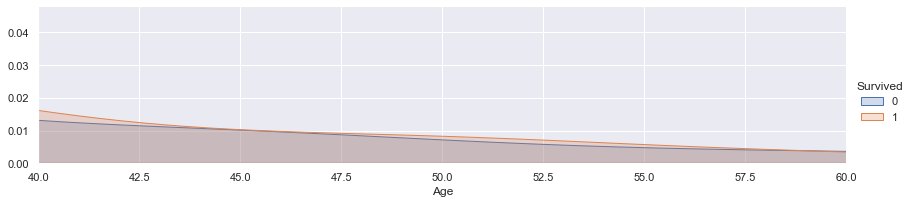

In [55]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Age", shade=True)
facet.set(xlim=(0, train["Age"].max()))
facet.add_legend()
plt.xlim(40, 60)

(60.0, 80.0)

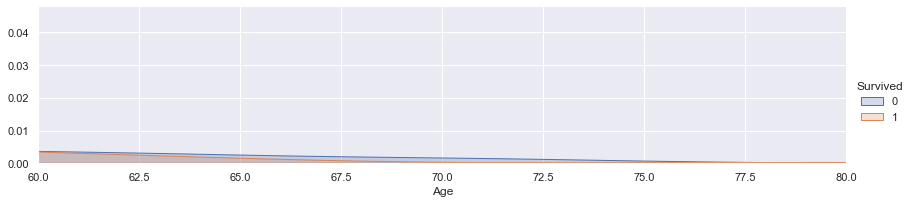

In [56]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Age", shade=True)
facet.set(xlim=(0, train["Age"].max()))
facet.add_legend()
plt.xlim(60)

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


In [58]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


4-2. Binning
Age of Categorical Variable

child: 0
young:1
adult:2
mid-age:3
senior:4

In [59]:
train_test_data = [train, test]
for dataset in train_test_data: 
     dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0 
     dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1 
     dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2 
     dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3 
     dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [60]:
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,3.0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,1.0


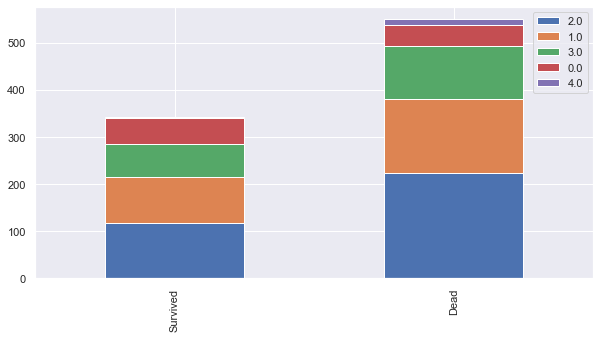

In [61]:
barchart("Age")

4. Embarked
4-1. Filling missing values

<AxesSubplot:>

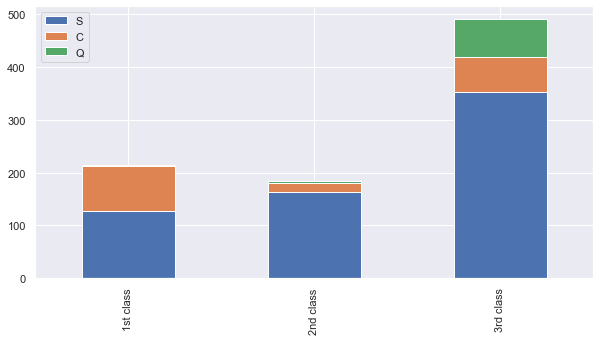

In [62]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

위차트의 결론도출 
Q에서 탄사람들은 1등급이 거의 없다
파란색이 모든 클래스의 50% 이상이다 embark정보가 없으면 파란색 S로 넣어도 무방하다

In [63]:
for dataset in train_test_data:
    dataset["Embarked"]=dataset["Embarked"].fillna('S')

In [64]:
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,3.0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,1.0


In [65]:
# Exchange from text to number
embarked_mapping = {"S":0, "C":1, "Q":2}
for dataset in train_test_data:
    dataset["Embarked"]=dataset["Embarked"].map(embarked_mapping)

5. Fare
Fare의 빠진 정보는 Pclass는 빠진 정보가 없었으므로 Pclass 가격의 median값을 넣는다

In [66]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,1.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,3.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2.0
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,3.0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,1.0


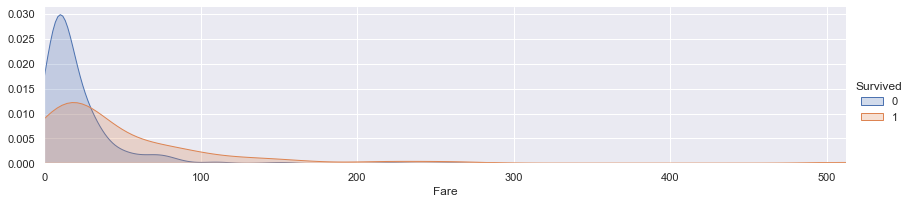

In [67]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Fare", shade=True)
facet.set(xlim=(0, train["Fare"].max()))
facet.add_legend()

plt.show()

(0.0, 20.0)

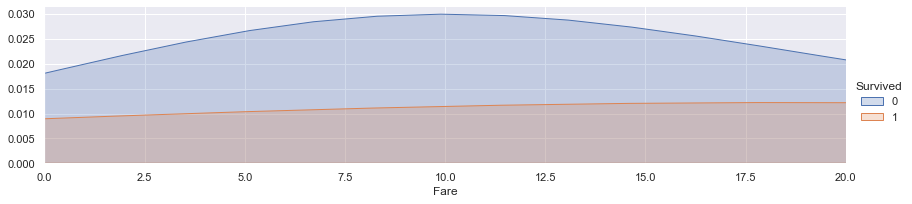

In [68]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

(0.0, 30.0)

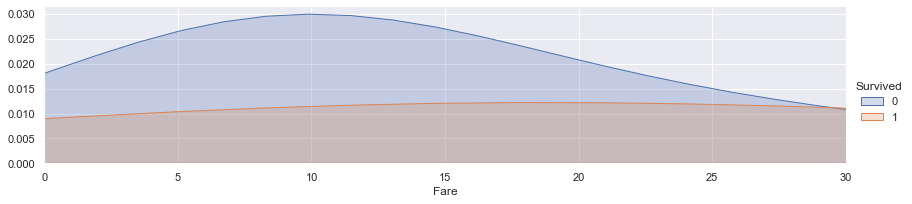

In [69]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)

(0.0, 512.3292)

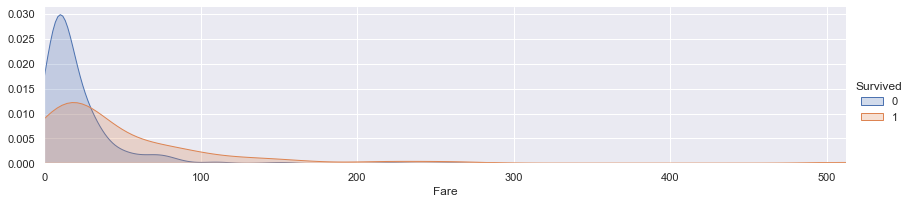

In [70]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0)

가격별 카테고리로 정한다.

In [71]:
for titanic_df in train_test_data:
    titanic_df.loc[ titanic_df['Fare'] <= 17, 'Fare'] = 0
    titanic_df.loc[(titanic_df['Fare'] > 17) & (titanic_df['Fare'] <= 30), 'Fare'] = 1
    titanic_df.loc[(titanic_df['Fare'] > 30) & (titanic_df['Fare'] <= 100), 'Fare'] = 2
    titanic_df.loc[ titanic_df['Fare'] > 100, 'Fare'] = 3

6. Cabin
호텔 방번호
알파벳+숫자

In [72]:
train.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
F2             3
C22 C26        3
              ..
E40            1
A20            1
C46            1
D45            1
C110           1
Name: Cabin, Length: 147, dtype: int64

In [73]:
# 첫번째 문자 알파벳만 추출
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

<AxesSubplot:>

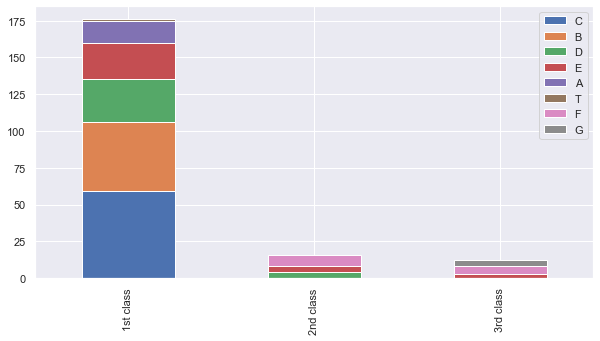

In [74]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [75]:
# feature scaling
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [76]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [77]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0.0, 11.0)

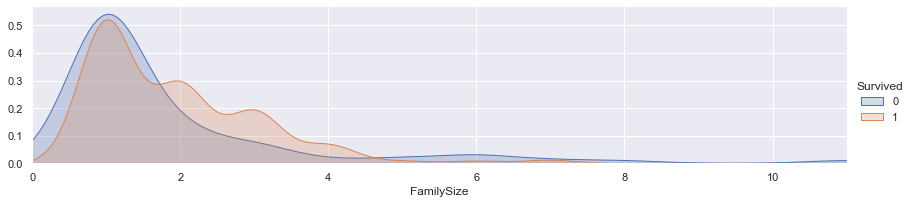

In [78]:
# odd
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [79]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [80]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,1.0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,3.0,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,2.0,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,3.0,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,1.0,0.0


In [81]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [82]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [83]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,1.0,0.4
1,1,1,3.0,2.0,0.8,1,3.0,0.4
2,3,1,1.0,0.0,2.0,0,2.0,0.0
3,1,1,2.0,2.0,0.8,0,3.0,0.4
4,3,0,2.0,0.0,2.0,0,1.0,0.0
5,3,0,2.0,0.0,2.0,2,1.0,0.0
6,1,0,3.0,2.0,1.6,0,1.0,0.0
7,3,0,0.0,1.0,2.0,0,1.0,1.6
8,3,1,2.0,0.0,2.0,0,3.0,0.8
9,2,1,0.0,2.0,1.8,1,3.0,0.4


# Step 5. Modeling

In [129]:
!pip install sklearn

     |████████████████████████████████| 7.3 MB 6.3 MB/s eta 0:00:01
     |████████████████████████████████| 302 kB 11.8 MB/s eta 0:00:01
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn ... done


In [84]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [85]:
# 1. Cross Validation(K-fold)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       891 non-null    float64
 8   FamilySize  891 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 62.8 KB


In [87]:
# 1.1 kNN
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.78888889 0.80898876 0.7752809  0.83146067 0.88764045 0.79775281
 0.82022472 0.80898876 0.82022472 0.78651685]


In [88]:
# kNN Score
round(np.mean(score)*100, 2)

81.26

In [89]:
# 1.2 Decision Tree
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.78888889 0.80898876 0.76404494 0.76404494 0.8988764  0.75280899
 0.83146067 0.79775281 0.74157303 0.80898876]


In [90]:
# decision tree Score
round(np.mean(score)*100, 2)

79.57

In [91]:
# 1.3 Random Forest
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.83146067 0.78651685 0.7752809  0.86516854 0.79775281
 0.82022472 0.80898876 0.76404494 0.82022472]


In [92]:
# Random Forest Score
round(np.mean(score)*100, 2)

80.36

In [93]:
# 1.4 Naive Bayes
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.85555556 0.7752809  0.74157303 0.70786517 0.69662921 0.78651685
 0.71910112 0.80898876 0.83146067 0.79775281]


In [94]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

77.21

In [95]:
# 1.5 SVM
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.79775281 0.79775281 0.78651685 0.84269663 0.79775281
 0.7752809  0.85393258 0.83146067 0.83146067]


In [96]:
# SVM Score
round(np.mean(score)*100,2)

81.26

# Step 6. Prediction & Submission

In [97]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [98]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   Fare         418 non-null    float64
 5   Cabin        418 non-null    float64
 6   Embarked     418 non-null    int64  
 7   Title        418 non-null    int64  
 8   FamilySize   418 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 29.5 KB


In [99]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [100]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


References
- https://www.kaggle.com/truongson1209/titanic-eda-ml-77
- https://github.com/minsuk-heo/kaggle-titanic